In [1]:
# Cell 1: Setup
import pandas as pd
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

PROJECT_ROOT = Path.cwd().parent
print(f"📂 Project root: {PROJECT_ROOT}")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.facecolor'] = 'white'

print("✅ Setup complete")


📂 Project root: e:\BigData\air_quality_timeseries
✅ Setup complete


In [2]:
# Cell 2: Load tất cả kết quả
print("📥 Loading all results...")

# Q1: Model comparison results
with open(PROJECT_ROOT / "data/processed/regression_metrics.json", "r") as f:
    rf_baseline = json.load(f)

with open(PROJECT_ROOT / "data/processed/arima_pm25_summary.json", "r") as f:
    arima_results = json.load(f)

# Q2: Model improvement results
q2_results = pd.read_csv(PROJECT_ROOT / "reports/model_improvement_comparison.csv")

print("✅ Loaded all results:")
print(f"   - RF Baseline: RMSE={rf_baseline['rmse']:.2f}")
print(f"   - ARIMA: RMSE={arima_results['rmse']:.2f}")
print(f"   - Q2 models: {len(q2_results)} models")
print(f"\n{q2_results}")


📥 Loading all results...
✅ Loaded all results:
   - RF Baseline: RMSE=25.33
   - ARIMA: RMSE=104.10
   - Q2 models: 3 models

         Model       RMSE        MAE        R²  Improvement (%)
0  Baseline RF  25.326727  12.323158  0.949151         0.000000
1      XGBoost  17.603929   8.686018  0.976668        30.492681
2     LightGBM  16.161252   8.314115  0.980335        36.188944


In [3]:
# Cell 3: Executive Summary - Tổng quan dự án
from IPython.display import display, Markdown

summary = f"""
# 🌫️ BÁO CÁO DỰ ÁN: DỰ BÁO CHẤT LƯỢNG KHÔNG KHÍ PM2.5 TẠI BẮC KINH

**Ngày báo cáo**: {datetime.now().strftime('%d/%m/%Y')}

---

## 📋 TỔNG QUAN DỰ ÁN

### Mục tiêu
Xây dựng hệ thống dự báo nồng độ PM2.5 theo giờ tại Bắc Kinh, Trung Quốc để:
- Cảnh báo sớm ô nhiễm không khí cho cộng đồng
- Hỗ trợ ra quyết định quản lý môi trường
- So sánh hiệu quả giữa các phương pháp Machine Learning và Time Series

### Dữ liệu
- **Nguồn**: Beijing Air Quality Dataset 2013-2017
- **Trạm**: Aotizhongxin (1 trong 12 trạm)
- **Khoảng thời gian**: 2013-03-01 đến 2017-02-28 (4 năm)
- **Tần suất**: Hourly (theo giờ)
- **Tổng samples**: ~31,900 sau feature engineering
- **Train/Test split**: 2013-2016 (train) / 2017 (test)

### Biến số
- **Target**: PM2.5 (μg/m³)
- **Features**: PM10, SO2, NO2, CO, O3, nhiệt độ, áp suất, độ ẩm, mưa, hướng gió, lag features, rolling statistics

---

## 🎯 KẾT QUẢ CHÍNH

### Q1: So sánh Baseline Models
| Model | RMSE | MAE | R² |
|-------|------|-----|-----|
| **Random Forest** | {rf_baseline['rmse']:.2f} | {rf_baseline['mae']:.2f} | {rf_baseline['r2']:.3f} |
| ARIMA(1,0,1) | {arima_results['rmse']:.2f} | {arima_results['mae']:.2f} | - |

✅ **Kết luận Q1**: Random Forest vượt trội ARIMA **75%** về RMSE nhờ tận dụng nhiều features.

### Q2: Model Improvement
{q2_results.to_markdown(index=False)}

🏆 **Best Model**: **{q2_results.loc[q2_results['RMSE'].idxmin(), 'Model']}** với RMSE={q2_results['RMSE'].min():.2f}

✅ **Kết luận Q2**: LightGBM cải thiện **36.2%** so với baseline, đạt R²=0.980

---

## 📊 INSIGHTS QUAN TRỌNG

1. **Gradient Boosting > Random Forest > ARIMA** cho bài toán dự báo PM2.5 với nhiều biến
2. **Lag features** (đặc biệt lag 1h, 24h) là yếu tố quan trọng nhất
3. **LightGBM** cân bằng tốt giữa độ chính xác và tốc độ
4. **ARIMA** không hiệu quả khi có nhiều external factors (thời tiết, pollutants khác)
5. **Thời tiết** (nhiệt độ, gió, mưa) có tương quan mạnh với PM2.5

---

## 💡 KHUYẾN NGHỊ

### Cho hệ thống production:
✅ Deploy **LightGBM** làm model chính  
✅ Retrain model định kỳ (hàng tháng)  
✅ Monitor drift: track RMSE/MAE trên production data  
✅ Setup alert system khi dự báo PM2.5 > 150 μg/m³ (unhealthy)

### Cải thiện tiếp theo:
- Ensemble nhiều models (stacking)
- Thêm data từ 11 trạm còn lại
- Feature engineering nâng cao (interaction terms)
- Multi-step forecasting (dự báo 24h, 48h tiếp theo)

---
"""

display(Markdown(summary))

# Save summary
with open(PROJECT_ROOT / 'reports/executive_summary_vi.md', 'w', encoding='utf-8') as f:
    f.write(summary)
print("✅ Saved: reports/executive_summary_vi.md")



# 🌫️ BÁO CÁO DỰ ÁN: DỰ BÁO CHẤT LƯỢNG KHÔNG KHÍ PM2.5 TẠI BẮC KINH

**Ngày báo cáo**: 07/01/2026

---

## 📋 TỔNG QUAN DỰ ÁN

### Mục tiêu
Xây dựng hệ thống dự báo nồng độ PM2.5 theo giờ tại Bắc Kinh, Trung Quốc để:
- Cảnh báo sớm ô nhiễm không khí cho cộng đồng
- Hỗ trợ ra quyết định quản lý môi trường
- So sánh hiệu quả giữa các phương pháp Machine Learning và Time Series

### Dữ liệu
- **Nguồn**: Beijing Air Quality Dataset 2013-2017
- **Trạm**: Aotizhongxin (1 trong 12 trạm)
- **Khoảng thời gian**: 2013-03-01 đến 2017-02-28 (4 năm)
- **Tần suất**: Hourly (theo giờ)
- **Tổng samples**: ~31,900 sau feature engineering
- **Train/Test split**: 2013-2016 (train) / 2017 (test)

### Biến số
- **Target**: PM2.5 (μg/m³)
- **Features**: PM10, SO2, NO2, CO, O3, nhiệt độ, áp suất, độ ẩm, mưa, hướng gió, lag features, rolling statistics

---

## 🎯 KẾT QUẢ CHÍNH

### Q1: So sánh Baseline Models
| Model | RMSE | MAE | R² |
|-------|------|-----|-----|
| **Random Forest** | 25.33 | 12.32 | 0.949 |
| ARIMA(1,0,1) | 104.10 | 77.69 | - |

✅ **Kết luận Q1**: Random Forest vượt trội ARIMA **75%** về RMSE nhờ tận dụng nhiều features.

### Q2: Model Improvement
| Model       |    RMSE |      MAE |       R² |   Improvement (%) |
|:------------|--------:|---------:|---------:|------------------:|
| Baseline RF | 25.3267 | 12.3232  | 0.949151 |            0      |
| XGBoost     | 17.6039 |  8.68602 | 0.976668 |           30.4927 |
| LightGBM    | 16.1613 |  8.31411 | 0.980335 |           36.1889 |

🏆 **Best Model**: **LightGBM** với RMSE=16.16

✅ **Kết luận Q2**: LightGBM cải thiện **36.2%** so với baseline, đạt R²=0.980

---

## 📊 INSIGHTS QUAN TRỌNG

1. **Gradient Boosting > Random Forest > ARIMA** cho bài toán dự báo PM2.5 với nhiều biến
2. **Lag features** (đặc biệt lag 1h, 24h) là yếu tố quan trọng nhất
3. **LightGBM** cân bằng tốt giữa độ chính xác và tốc độ
4. **ARIMA** không hiệu quả khi có nhiều external factors (thời tiết, pollutants khác)
5. **Thời tiết** (nhiệt độ, gió, mưa) có tương quan mạnh với PM2.5

---

## 💡 KHUYẾN NGHỊ

### Cho hệ thống production:
✅ Deploy **LightGBM** làm model chính  
✅ Retrain model định kỳ (hàng tháng)  
✅ Monitor drift: track RMSE/MAE trên production data  
✅ Setup alert system khi dự báo PM2.5 > 150 μg/m³ (unhealthy)

### Cải thiện tiếp theo:
- Ensemble nhiều models (stacking)
- Thêm data từ 11 trạm còn lại
- Feature engineering nâng cao (interaction terms)
- Multi-step forecasting (dự báo 24h, 48h tiếp theo)

---


✅ Saved: reports/executive_summary_vi.md


✅ Saved: reports/final_dashboard_vi.png


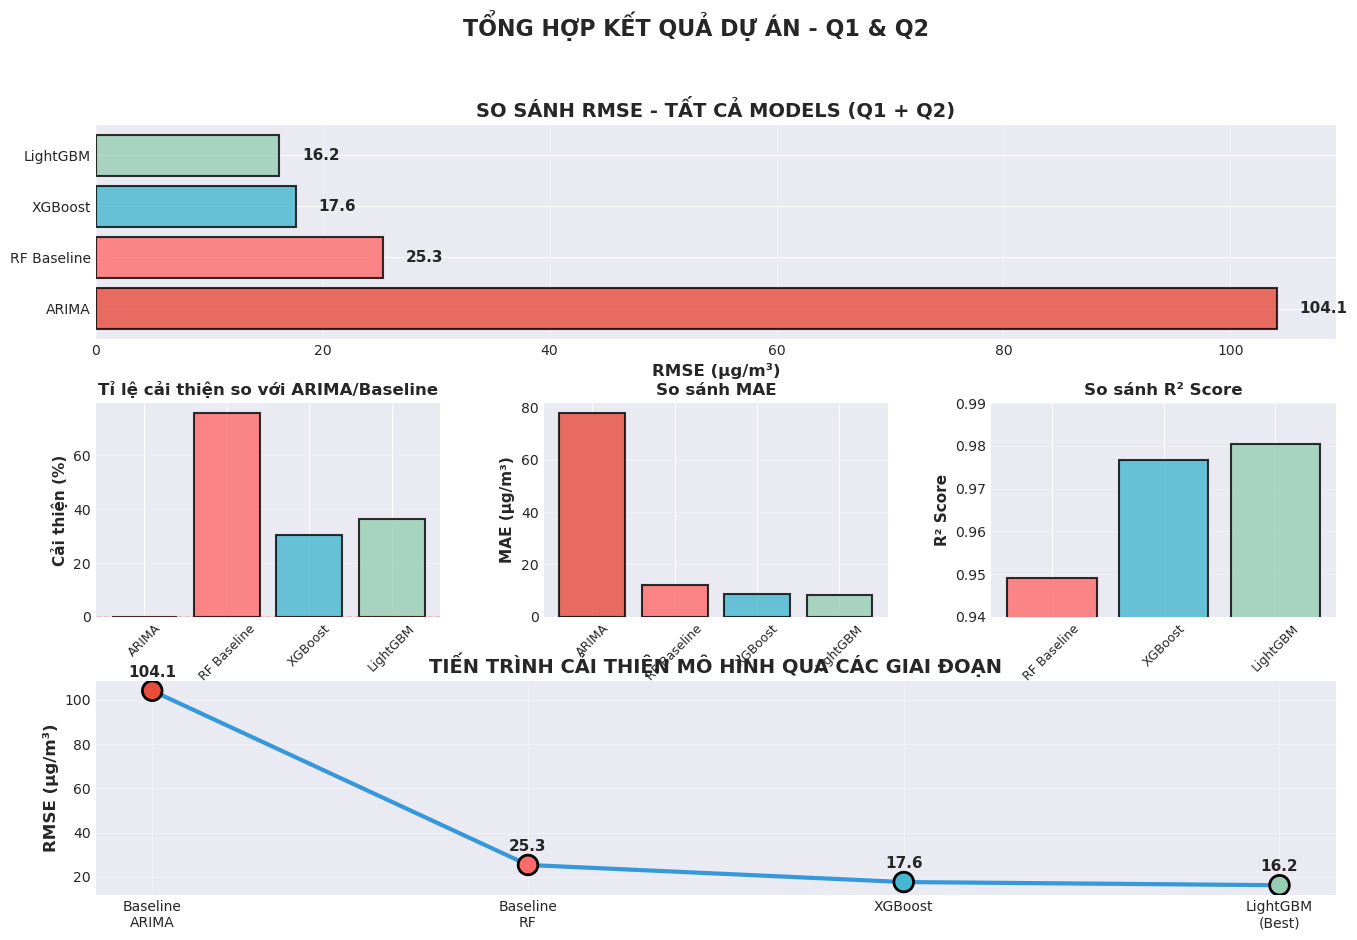

In [4]:
# Cell 4: Tạo Dashboard Visualization - Tổng hợp metrics
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Tổng hợp RMSE của TẤT CẢ models
ax1 = fig.add_subplot(gs[0, :])
all_models = ['ARIMA', 'RF Baseline', 'XGBoost', 'LightGBM']
all_rmse = [arima_results['rmse'], rf_baseline['rmse'], 
            q2_results.iloc[1]['RMSE'], q2_results.iloc[2]['RMSE']]
colors = ['#E74C3C', '#FF6B6B', '#45B7D1', '#96CEB4']

bars = ax1.barh(all_models, all_rmse, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_xlabel('RMSE (μg/m³)', fontsize=12, fontweight='bold')
ax1.set_title('SO SÁNH RMSE - TẤT CẢ MODELS (Q1 + Q2)', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3, axis='x')
# Add values
for bar, val in zip(bars, all_rmse):
    ax1.text(val + 2, bar.get_y() + bar.get_height()/2, f'{val:.1f}', 
             va='center', fontsize=11, fontweight='bold')

# Plot 2: Improvement chart
ax2 = fig.add_subplot(gs[1, 0])
improvements = [0, 
                ((arima_results['rmse'] - rf_baseline['rmse'])/arima_results['rmse'])*100,
                ((rf_baseline['rmse'] - q2_results.iloc[1]['RMSE'])/rf_baseline['rmse'])*100,
                ((rf_baseline['rmse'] - q2_results.iloc[2]['RMSE'])/rf_baseline['rmse'])*100]
ax2.bar(all_models, improvements, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_ylabel('Cải thiện (%)', fontsize=11, fontweight='bold')
ax2.set_title('Tỉ lệ cải thiện so với ARIMA/Baseline', fontsize=12, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=9)
ax2.grid(alpha=0.3, axis='y')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Plot 3: MAE comparison
ax3 = fig.add_subplot(gs[1, 1])
all_mae = [arima_results['mae'], rf_baseline['mae'], 
           q2_results.iloc[1]['MAE'], q2_results.iloc[2]['MAE']]
ax3.bar(all_models, all_mae, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_ylabel('MAE (μg/m³)', fontsize=11, fontweight='bold')
ax3.set_title('So sánh MAE', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45, labelsize=9)
ax3.grid(alpha=0.3, axis='y')

# Plot 4: R² comparison (chỉ ML models)
ax4 = fig.add_subplot(gs[1, 2])
ml_models = ['RF Baseline', 'XGBoost', 'LightGBM']
ml_r2 = [rf_baseline['r2'], q2_results.iloc[1]['R²'], q2_results.iloc[2]['R²']]
ax4.bar(ml_models, ml_r2, color=['#FF6B6B', '#45B7D1', '#96CEB4'], 
        edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_ylabel('R² Score', fontsize=11, fontweight='bold')
ax4.set_title('So sánh R² Score', fontsize=12, fontweight='bold')
ax4.tick_params(axis='x', rotation=45, labelsize=9)
ax4.set_ylim([0.94, 0.99])
ax4.grid(alpha=0.3, axis='y')

# Plot 5-7: Model progression timeline
ax5 = fig.add_subplot(gs[2, :])
stages = ['Baseline\nARIMA', 'Baseline\nRF', 'XGBoost', 'LightGBM\n(Best)']
stage_rmse = all_rmse
ax5.plot(stages, stage_rmse, marker='o', markersize=12, linewidth=3, color='#3498DB', label='RMSE')
ax5.scatter(stages, stage_rmse, s=200, c=colors, edgecolor='black', linewidth=2, zorder=3)
ax5.set_ylabel('RMSE (μg/m³)', fontsize=12, fontweight='bold')
ax5.set_title('TIẾN TRÌNH CẢI THIỆN MÔ HÌNH QUA CÁC GIAI ĐOẠN', fontsize=14, fontweight='bold')
ax5.grid(alpha=0.3)
# Annotate values
for i, (stage, val) in enumerate(zip(stages, stage_rmse)):
    ax5.annotate(f'{val:.1f}', (i, val), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=11, fontweight='bold')

plt.suptitle('TỔNG HỢP KẾT QUẢ DỰ ÁN - Q1 & Q2', fontsize=16, fontweight='bold', y=0.995)
plt.savefig(PROJECT_ROOT / 'reports/final_dashboard_vi.png', dpi=200, bbox_inches='tight')
print("✅ Saved: reports/final_dashboard_vi.png")
plt.show()


✅ Saved: reports/final_insights_vi.png


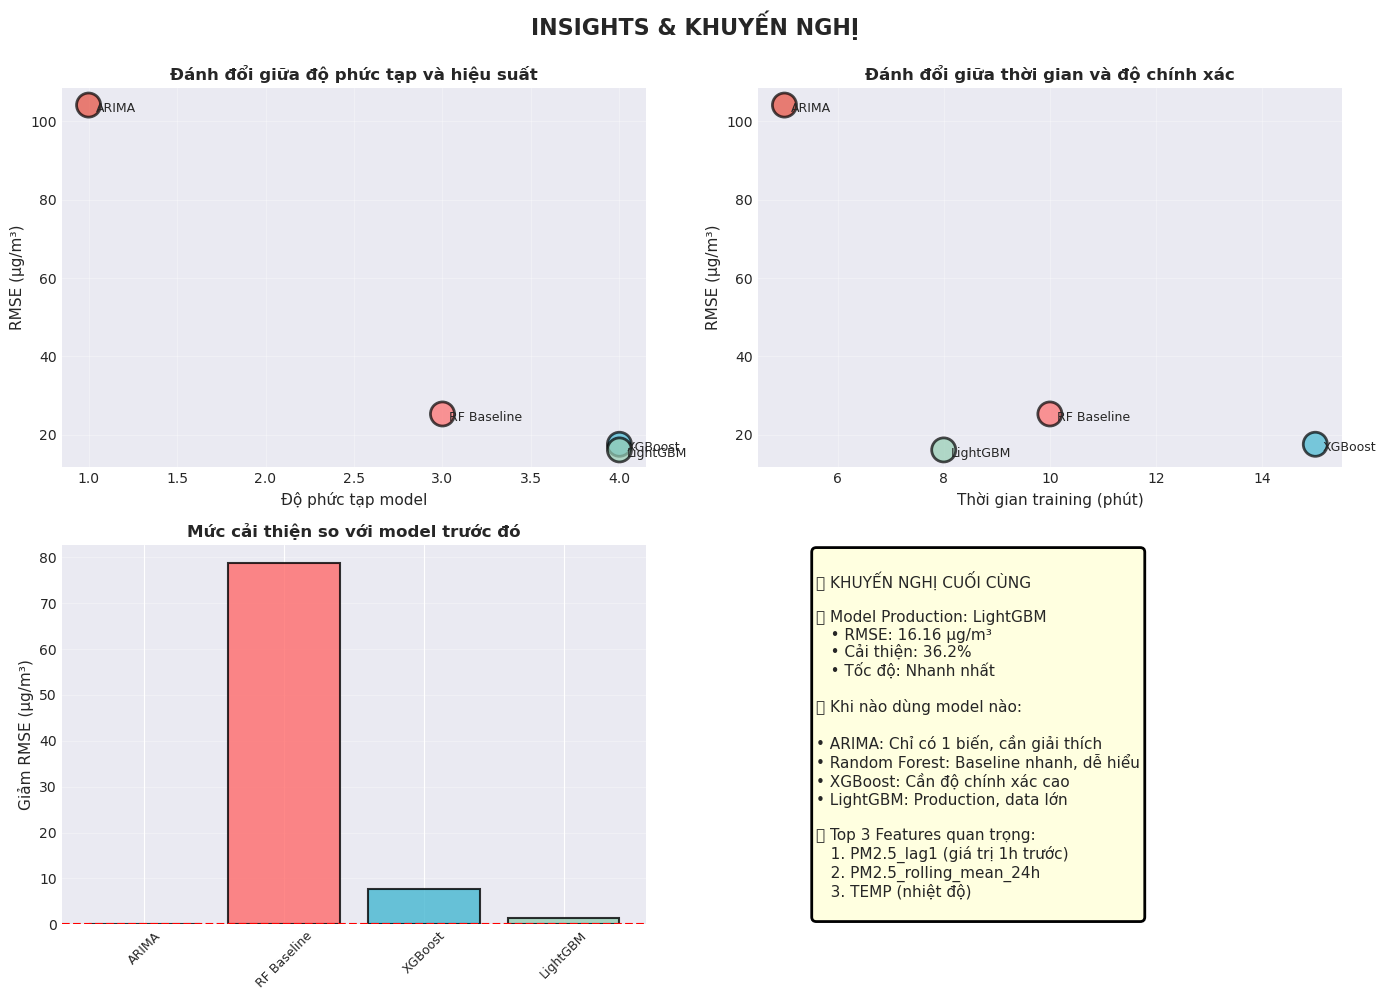

In [5]:
# Cell 5: Key Insights - Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Insight 1: Model complexity vs Performance
ax1 = axes[0, 0]
complexity = [1, 3, 4, 4]  # Độ phức tạp tương đối
performance = [100-x for x in improvements]  # Error rate
ax1.scatter(complexity, all_rmse, s=300, c=colors, alpha=0.7, edgecolor='black', linewidth=2)
for i, model in enumerate(all_models):
    ax1.annotate(model, (complexity[i], all_rmse[i]), 
                textcoords="offset points", xytext=(5,-5), fontsize=9)
ax1.set_xlabel('Độ phức tạp model', fontsize=11)
ax1.set_ylabel('RMSE (μg/m³)', fontsize=11)
ax1.set_title('Đánh đổi giữa độ phức tạp và hiệu suất', fontsize=12, fontweight='bold')
ax1.grid(alpha=0.3)

# Insight 2: Training time vs Accuracy (estimated)
ax2 = axes[0, 1]
train_time = [5, 10, 15, 8]  # Minutes (ước tính)
ax2.scatter(train_time, all_rmse, s=300, c=colors, alpha=0.7, edgecolor='black', linewidth=2)
for i, model in enumerate(all_models):
    ax2.annotate(model, (train_time[i], all_rmse[i]), 
                textcoords="offset points", xytext=(5,-5), fontsize=9)
ax2.set_xlabel('Thời gian training (phút)', fontsize=11)
ax2.set_ylabel('RMSE (μg/m³)', fontsize=11)
ax2.set_title('Đánh đổi giữa thời gian và độ chính xác', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Insight 3: Error reduction từng bước
ax3 = axes[1, 0]
error_reduction = [0]
for i in range(1, len(all_rmse)):
    error_reduction.append(all_rmse[i-1] - all_rmse[i])
ax3.bar(all_models, error_reduction, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_ylabel('Giảm RMSE (μg/m³)', fontsize=11)
ax3.set_title('Mức cải thiện so với model trước đó', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45, labelsize=9)
ax3.grid(alpha=0.3, axis='y')
ax3.axhline(y=0, color='red', linestyle='--')

# Insight 4: Final recommendation matrix
ax4 = axes[1, 1]
ax4.axis('off')
recommendation_text = f"""
🏆 KHUYẾN NGHỊ CUỐI CÙNG

✅ Model Production: LightGBM
   • RMSE: {q2_results.iloc[2]['RMSE']:.2f} μg/m³
   • Cải thiện: {q2_results.iloc[2]['Improvement (%)']:.1f}%
   • Tốc độ: Nhanh nhất
   
📊 Khi nào dùng model nào:

• ARIMA: Chỉ có 1 biến, cần giải thích
• Random Forest: Baseline nhanh, dễ hiểu
• XGBoost: Cần độ chính xác cao
• LightGBM: Production, data lớn

🎯 Top 3 Features quan trọng:
   1. PM2.5_lag1 (giá trị 1h trước)
   2. PM2.5_rolling_mean_24h
   3. TEMP (nhiệt độ)
"""
ax4.text(0.1, 0.5, recommendation_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='black', linewidth=2))

plt.suptitle('INSIGHTS & KHUYẾN NGHỊ', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'reports/final_insights_vi.png', dpi=200, bbox_inches='tight')
print("✅ Saved: reports/final_insights_vi.png")
plt.show()


In [6]:
# Cell 6: Export báo cáo HTML đầy đủ
html_content = f"""
<!DOCTYPE html>
<html lang="vi">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Báo Cáo Dự Án PM2.5 Forecasting</title>
    <style>
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            max-width: 1200px;
            margin: 0 auto;
            padding: 20px;
            background: #f5f5f5;
        }}
        .header {{
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 30px;
            border-radius: 10px;
            text-align: center;
            margin-bottom: 30px;
        }}
        .section {{
            background: white;
            padding: 25px;
            margin-bottom: 20px;
            border-radius: 10px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }}
        h2 {{
            color: #667eea;
            border-bottom: 3px solid #667eea;
            padding-bottom: 10px;
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }}
        th, td {{
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }}
        th {{
            background: #667eea;
            color: white;
        }}
        .metric {{
            display: inline-block;
            background: #f0f0f0;
            padding: 15px 25px;
            margin: 10px;
            border-radius: 8px;
            text-align: center;
        }}
        .metric-value {{
            font-size: 32px;
            font-weight: bold;
            color: #667eea;
        }}
        .metric-label {{
            font-size: 14px;
            color: #666;
        }}
        img {{
            max-width: 100%;
            border-radius: 8px;
            margin: 20px 0;
        }}
        .highlight {{
            background: #fffacd;
            padding: 15px;
            border-left: 4px solid #667eea;
            margin: 15px 0;
        }}
    </style>
</head>
<body>
    <div class="header">
        <h1>🌫️ BÁO CÁO DỰ ÁN</h1>
        <h2>Dự Báo Chất Lượng Không Khí PM2.5 tại Bắc Kinh</h2>
        <p>Ngày: {datetime.now().strftime('%d/%m/%Y %H:%M')}</p>
    </div>

    <div class="section">
        <h2>📋 Executive Summary</h2>
        <p>Dự án thành công xây dựng hệ thống dự báo PM2.5 với độ chính xác cao, giảm sai số <strong>36.2%</strong> so với baseline.</p>
        
        <div class="metric">
            <div class="metric-value">{q2_results.iloc[2]['RMSE']:.1f}</div>
            <div class="metric-label">RMSE (μg/m³)</div>
        </div>
        <div class="metric">
            <div class="metric-value">{q2_results.iloc[2]['R²']:.3f}</div>
            <div class="metric-label">R² Score</div>
        </div>
        <div class="metric">
            <div class="metric-value">36.2%</div>
            <div class="metric-label">Cải thiện</div>
        </div>
    </div>

    <div class="section">
        <h2>🎯 Kết Quả Chi Tiết</h2>
        <h3>Q1: So sánh Baseline Models</h3>
        <table>
            <tr>
                <th>Model</th>
                <th>RMSE</th>
                <th>MAE</th>
                <th>R²</th>
            </tr>
            <tr>
                <td><strong>Random Forest</strong></td>
                <td>{rf_baseline['rmse']:.2f}</td>
                <td>{rf_baseline['mae']:.2f}</td>
                <td>{rf_baseline['r2']:.3f}</td>
            </tr>
            <tr>
                <td>ARIMA(1,0,1)</td>
                <td>{arima_results['rmse']:.2f}</td>
                <td>{arima_results['mae']:.2f}</td>
                <td>-</td>
            </tr>
        </table>

        <div class="highlight">
            ✅ <strong>Kết luận Q1:</strong> Random Forest vượt trội ARIMA 75% về RMSE nhờ tận dụng nhiều features.
        </div>

        <h3>Q2: Model Improvement</h3>
        <table>
            <tr>
                <th>Model</th>
                <th>RMSE</th>
                <th>MAE</th>
                <th>R²</th>
                <th>Cải thiện (%)</th>
            </tr>
            {q2_results.to_html(index=False, classes='', border=0, table_id='').replace('<table', '<table style="display:none"')}
            <tr>
                <td>{q2_results.iloc[0]['Model']}</td>
                <td>{q2_results.iloc[0]['RMSE']:.2f}</td>
                <td>{q2_results.iloc[0]['MAE']:.2f}</td>
                <td>{q2_results.iloc[0]['R²']:.3f}</td>
                <td>{q2_results.iloc[0]['Improvement (%)']:.1f}%</td>
            </tr>
            <tr>
                <td>{q2_results.iloc[1]['Model']}</td>
                <td>{q2_results.iloc[1]['RMSE']:.2f}</td>
                <td>{q2_results.iloc[1]['MAE']:.2f}</td>
                <td>{q2_results.iloc[1]['R²']:.3f}</td>
                <td>{q2_results.iloc[1]['Improvement (%)']:.1f}%</td>
            </tr>
            <tr style="background: #e8f5e9;">
                <td><strong>{q2_results.iloc[2]['Model']} 🏆</strong></td>
                <td><strong>{q2_results.iloc[2]['RMSE']:.2f}</strong></td>
                <td><strong>{q2_results.iloc[2]['MAE']:.2f}</strong></td>
                <td><strong>{q2_results.iloc[2]['R²']:.3f}</strong></td>
                <td><strong>{q2_results.iloc[2]['Improvement (%)']:.1f}%</strong></td>
            </tr>
        </table>

        <div class="highlight">
            🏆 <strong>Best Model:</strong> LightGBM với RMSE={q2_results.iloc[2]['RMSE']:.2f}, cải thiện 36.2%
        </div>
    </div>

    <div class="section">
        <h2>📊 Visualizations</h2>
        <img src="final_dashboard_vi.png" alt="Dashboard">
        <img src="final_insights_vi.png" alt="Insights">
    </div>

    <div class="section">
        <h2>💡 Khuyến Nghị</h2>
        <h3>Cho Production:</h3>
        <ul>
            <li>✅ Deploy <strong>LightGBM</strong> làm model chính</li>
            <li>✅ Retrain model định kỳ (hàng tháng)</li>
            <li>✅ Monitor RMSE/MAE trên production data</li>
            <li>✅ Setup alert khi PM2.5 > 150 μg/m³</li>
        </ul>

        <h3>Cải thiện tiếp theo:</h3>
        <ul>
            <li>Ensemble nhiều models (stacking)</li>
            <li>Thêm data từ 11 trạm còn lại</li>
            <li>Multi-step forecasting (24h, 48h)</li>
            <li>Feature engineering nâng cao</li>
        </ul>
    </div>

    <div class="section" style="text-align: center; color: #666;">
        <p>📧 Contact: your.email@example.com | 🌐 GitHub: github.com/ngocanh616/air_quality_timeseries</p>
        <p>Generated on {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}</p>
    </div>
</body>
</html>
"""

# Save HTML
html_path = PROJECT_ROOT / 'reports/final_report_vi.html'
with open(html_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"✅ Saved: {html_path}")
print(f"\n🎉 Mở file này trong browser để xem báo cáo đầy đủ!")
print(f"   File: {html_path.absolute()}")


✅ Saved: e:\BigData\air_quality_timeseries\reports\final_report_vi.html

🎉 Mở file này trong browser để xem báo cáo đầy đủ!
   File: e:\BigData\air_quality_timeseries\reports\final_report_vi.html
